In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv("spam.csv", encoding="latin1")



In [54]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
df.shape

(5572, 5)

## 1 Data cleaning 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [57]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [58]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace= True)

In [59]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
## rename the columns name 
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [61]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
df["target"] = encoder.fit_transform(df["target"])

In [64]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [66]:
## check for duplicate values
df.duplicated().sum()

np.int64(403)

In [67]:
## remove duplicates
df = df.drop_duplicates(keep = 'first')

In [68]:
df.duplicated().sum()

np.int64(0)

## EDA

In [69]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

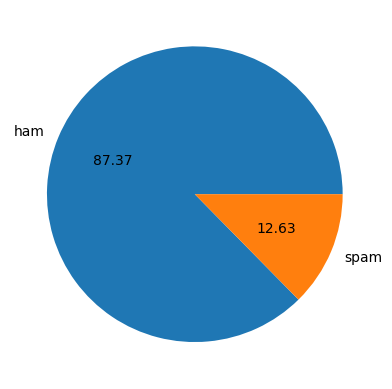

In [70]:
## data is imbalance 
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [71]:
df["no_of_char"] = df["text"].apply(len)

In [72]:
df.head()

,target,text,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
def tokenize_text(text):
    words = []
    for word in text.split():
        # Remove leading and trailing punctuation manually
        word = word.strip(".,!?;:\"'()[]{}-*_/\\")
        if word:  # Avoid adding empty strings
            words.append(word)
    return words

# Apply function to count words
df["num_words"] = df["text"].astype(str).apply(lambda x: len(tokenize_text(x)))



In [74]:
# df.drop(columns=["word_count"],inplace= True)

In [75]:
df.head()

,target,text,no_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [76]:
import re

def count_sentences(text):
    if not isinstance(text, str):  # Handle non-string values
        return 0
    sentences = re.split(r'[.!?]+', text)  # Split using `.`, `!`, or `?`
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty sentences
    return len(sentences)


In [77]:
df["sentence_count"] = df["text"].apply(count_sentences)


In [78]:
df.head()

,target,text,no_of_char,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [79]:
df[['no_of_char','num_words','sentence_count']].describe()

,no_of_char,num_words,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.163281,2.304508
std,58.236293,10.881114,1.639932
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [80]:
import seaborn as sns

<Axes: xlabel='no_of_char', ylabel='Count'>

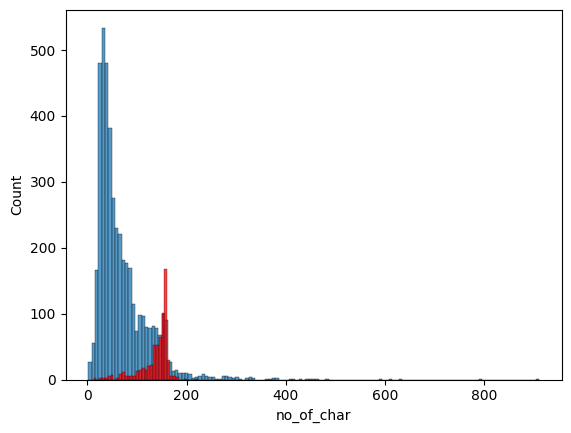

In [81]:
sns.histplot(df[df['target'] == 0]['no_of_char'])
sns.histplot(df[df['target'] == 1]['no_of_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

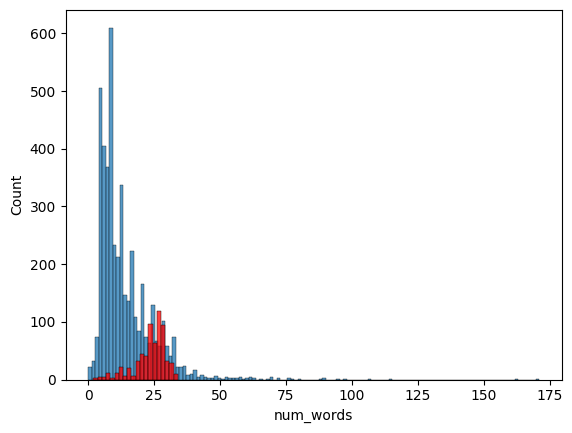

In [82]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
= Removing stop words and punctuation
- Stemming

In [83]:
import nltk

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\saroh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
import string

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Split into words manually (alternative to word_tokenize)
    words = text.split()
    
    # Remove punctuation
    words = [word.strip(string.punctuation) for word in words if word.strip(string.punctuation)]
    
    # Define a minimal stopwords list
    stopwords_set = {"i", "am", "is", "and", "to", "about", "this", "it", "been", "the", "on", "a"}
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords_set]
    
    # Stemming alternative (basic approach)
    def porter_stemmer(word):
        suffixes = ["ing", "ed", "es", "s", "ly"]
        for suffix in suffixes:
            if word.endswith(suffix) and len(word) > len(suffix):
                return word[:-len(suffix)]
        return word
    
    words = [porter_stemmer(word) for word in words]
    
    return " ".join(words)

# Example usage
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
print(transform_text(text))


i'm gonna be home soon don't want talk stuff anymore tonight k i've cri enough today


In [145]:
from nltk.data import find
print(find("tokenizers/punkt"))



C:\Users\saroh\AppData\Roaming\nltk_data\tokenizers\punkt


In [86]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [87]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [88]:
df['transformed_text'] = df['text'].apply(transform_text)

In [89]:
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go until jurong point crazy available on in bu...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 wk comp win fa cup final tkt 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say so ear hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don't think he go usf he liv around here t...


In [90]:
# !pip install wordcloud


In [91]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

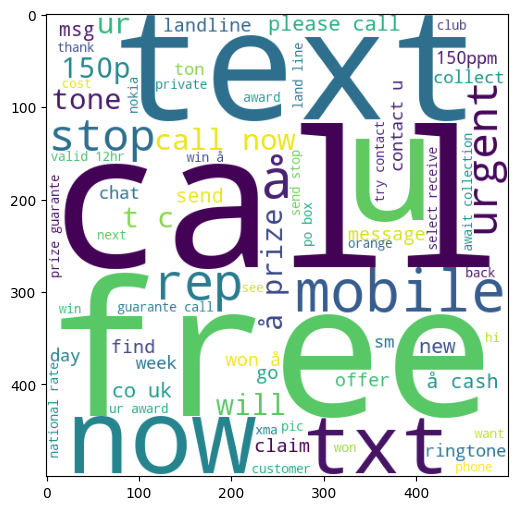

In [93]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [94]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

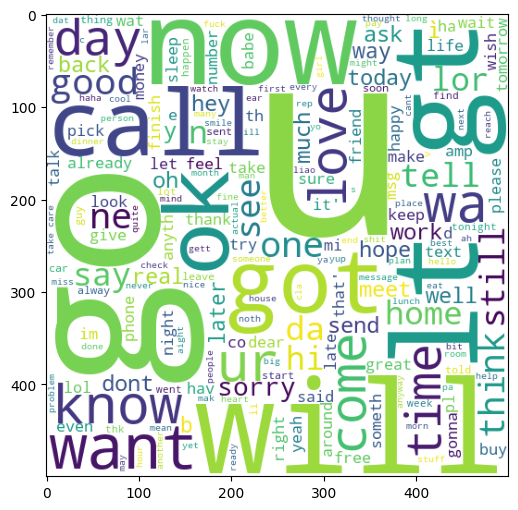

In [95]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [96]:
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go until jurong point crazy available on in bu...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 wk comp win fa cup final tkt 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say so ear hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don't think he go usf he liv around here t...


In [97]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(spam_corpus)

13586

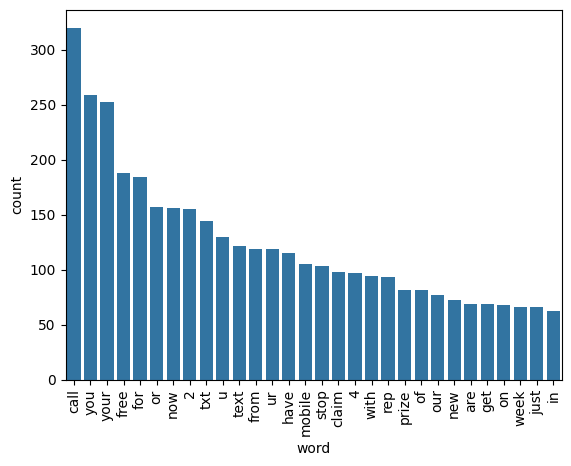

In [99]:
from collections import Counter

import matplotlib.pyplot as plt


# Get most common 30 words from spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename columns for clarity
common_words.columns = ['word', 'count']

# Plot using seaborn
sns.barplot(x=common_words['word'], y=common_words['count'])

plt.xticks(rotation='vertical')
plt.show()


In [100]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [101]:
len(ham_corpus)

54352

In [102]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go until jurong point crazy available on in bu...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in 2 wk comp win fa cup final tkt 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say so ear hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don't think he go usf he liv around here t...


## Model building



In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [104]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [105]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [106]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [107]:
X.shape

(5169, 3000)

In [108]:
y = df['target'].values

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [112]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [113]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8839458413926499
[[796 100]
 [ 20 118]]
0.5412844036697247


In [114]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[892   4]
 [ 14 124]]
0.96875


In [115]:
# !pip install xgboost


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [117]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [118]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [119]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [120]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9836065573770492)

In [121]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.937137330754352
Precision -  0.9195402298850575
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8712121212121212
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9555125725338491
Precision -  0.96
For  xgb
Accuracy -  0.9796905222437138
Precision -  0.975609756097561


In [122]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [123]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.971954,1.000000
5,RF,0.973888,1.000000
0,SVC,0.980658,0.983607
8,ETC,0.979691,0.975610
10,xgb,0.979691,0.975610
9,GBDT,0.955513,0.960000
4,LR,0.957447,0.951923
6,AdaBoost,0.937137,0.919540
3,DT,0.938104,0.877551


In [124]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [125]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.980658
4,ETC,Accuracy,0.979691
5,xgb,Accuracy,0.979691
6,GBDT,Accuracy,0.955513
7,LR,Accuracy,0.957447
8,AdaBoost,Accuracy,0.937137
9,DT,Accuracy,0.938104


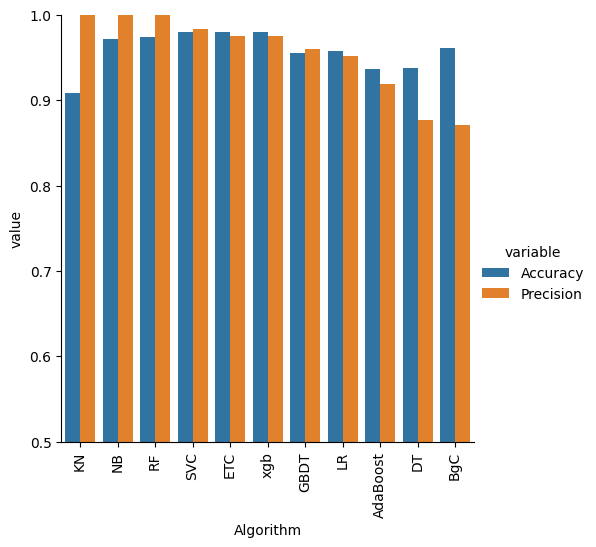

In [126]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [127]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [128]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [129]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [130]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [131]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [133]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,SVC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,ETC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
5,xgb,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
6,GBDT,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
7,LR,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
8,AdaBoost,0.937137,0.919540,0.937137,0.919540,0.937137,0.919540,0.937137,0.919540
9,DT,0.938104,0.877551,0.938104,0.877551,0.938104,0.877551,0.938104,0.877551


In [134]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [135]:

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [136]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [137]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [138]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [139]:
from sklearn.ensemble import StackingClassifier

In [140]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [141]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9562043795620438


In [142]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))